<a href="https://www.bigdatauniversity.com"><img src = "https://ibm.box.com/shared/static/wbqvbi6o6ip0vz55ua5gp17g4f1k7ve9.png" width = 300, align = "center"></a>
# <center>Decision Trees</center>


In this lab exercise, you will learn a popular machine learning algorithm, Decision Tree. 

Import the Following Libraries:
<ul>
    <li> <b>numpy (as np)</b> </li>
    <li> <b>pandas</b> </li>
    <li> <b>DecisionTreeClassifier</b> from <b>sklearn.tree</b> </li>
</ul>

In [2]:
import numpy as np 
import pandas 
from sklearn.tree import DecisionTreeClassifier

Next, a little information about the dataset. We are using a dataset called skulls.csv, which contains the measurements made on Egyptian skulls from five epochs.

<img src = "https://ibm.box.com/shared/static/02z8krlr99hwrqa2ecx3ycuiwqkcuzjv.png" align = 'left'>



<b>epoch</b> - The epoch the skull as assigned to, a factor with levels c4000BC c3300BC, c1850BC, c200BC, and cAD150, where the years are only given approximately.

<b>mb</b> - Maximal Breadth of the skull.

<b>bh</b> - Basiregmatic Heights of the skull.

<b>bl</b> - Basilveolar Length of the skull.

<b>nh</b> - Nasal Heights of the skull.

---

Lets download the data:

In [3]:
my_data = pandas.read_csv("https://vincentarelbundock.github.io/Rdatasets/csv/HSAUR/skulls.csv", delimiter=",")
my_data[0:5]

,Unnamed: 0,epoch,mb,bh,bl,nh
0,1,c4000BC,131,138,89,49
1,2,c4000BC,125,131,92,48
2,3,c4000BC,131,132,99,50
3,4,c4000BC,119,132,96,44
4,5,c4000BC,136,143,100,54


## Practice 
What is the size of data? 

In [4]:
# write your code here




Using <b>my_data</b> as the skulls.csv data read by pandas, declare the following variables: <br>
<ul>
    <li> <b> X </b> as the <b> Feature Matrix </b> (data of my_data) </li>

    
    <li> <b> y </b> as the <b> response vector (target) </b> </li>

    
    <li> <b> targetNames </b> as the <b> response vector names (target names)</b> </li>
    
    
    <li> <b> featureNames </b> as the <b> feature matrix column names </b> </li>
   
</ul>

Lets first get the attribute names for dataset

In [5]:
featureNames = list(my_data.columns.values)[2:6]
featureNames

['mb', 'bh', 'bl', 'nh']

Remove the column containing the target name since it doesn't contain numeric values.

In [6]:
# axis=1 means we are removing columns instead of rows.
X = my_data.drop(my_data.columns[[0,1]], axis=1).values
X[0:5]

array([[131, 138,  89,  49],
       [125, 131,  92,  48],
       [131, 132,  99,  50],
       [119, 132,  96,  44],
       [136, 143, 100,  54]])

In [7]:
targetNames = my_data["epoch"].unique().tolist()
targetNames

['c4000BC', 'c3300BC', 'c1850BC', 'c200BC', 'cAD150']

In [8]:
y = my_data["epoch"]
y[0:5]

0    c4000BC
1    c4000BC
2    c4000BC
3    c4000BC
4    c4000BC
Name: epoch, dtype: object

---
## Setting up the Decision Tree
We will be using <b>train/test split</b> on our <b>decision tree</b>. Let's import <b>train_test_split</b> from <b>sklearn.cross_validation</b>.

In [11]:
from sklearn.model_selection import train_test_split

Now <b> train_test_split </b> will return 4 different parameters. We will name them:<br>
X_trainset, X_testset, y_trainset, y_testset <br> <br>
The <b> train_test_split </b> will need the parameters: <br>
X, y, test_size=0.3, and random_state=3. <br> <br>
The <b>X</b> and <b>y</b> are the arrays required before the split, the <b>test_size</b> represents the ratio of the testing dataset, and the <b>random_state</b> ensures that we obtain the same splits.

In [12]:
X_trainset, X_testset, y_trainset, y_testset = train_test_split(X, y, test_size=0.3, random_state=3)

## Practice
Print the shape of X_trainset and y_trainset. Ensure that the dimensions match

In [13]:
# your code



Print the shape of X_testset and y_testset. Ensure that the dimensions match

In [14]:
# your code



We will first create an instance of the <b>DecisionTreeClassifier</b> called <b>skullsTree</b>.<br>
Inside of the classifier, specify <i> criterion="entropy" </i> so we can see the information gain of each node.

In [15]:
skullsTree = DecisionTreeClassifier(criterion="entropy", max_depth = 4)
skullsTree # it shows the default parameters

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=4,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

Next, we will fit the data with the training feature matrix <b> X_trainset </b> and training  response vector <b> y_trainset </b>

In [16]:
skullsTree.fit(X_trainset,y_trainset)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=4,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

Let's make some <b>predictions</b> on the testing dataset and store it into a variable called <b>predTree</b>.

In [17]:
predTree = skullsTree.predict(X_testset)

You can print out <b>predTree</b> and <b>y_testset</b> if you want to visually compare the prediction to the actual values.

In [18]:
print (predTree [0:5])
print (y_testset [0:5])


['c4000BC' 'c4000BC' 'c200BC' 'cAD150' 'c200BC']
47    c3300BC
3     c4000BC
31    c3300BC
25    c4000BC
15    c4000BC
Name: epoch, dtype: object


Next, let's import __metrics__ from sklearn and check the accuracy of our model.

In [20]:
from sklearn import metrics
import matplotlib.pyplot as plt
print("DecisionTrees's Accuracy: ", metrics.accuracy_score(y_testset, predTree))

DecisionTrees's Accuracy:  0.2222222222222222


__Accuracy classification score__ computes subset accuracy: the set of labels predicted for a sample must exactly match the corresponding set of labels in y_true.  

In multilabel classification, the function returns the subset accuracy. If the entire set of predicted labels for a sample strictly match with the true set of labels, then the subset accuracy is 1.0; otherwise it is 0.0.


## Practice 
Can you calculate the accuracy score without sklearn ?

In [21]:
# your code here



In [22]:
from sklearn.externals.six import StringIO
import pydotplus
import matplotlib.image as mpimg
from sklearn import tree
%matplotlib inline 


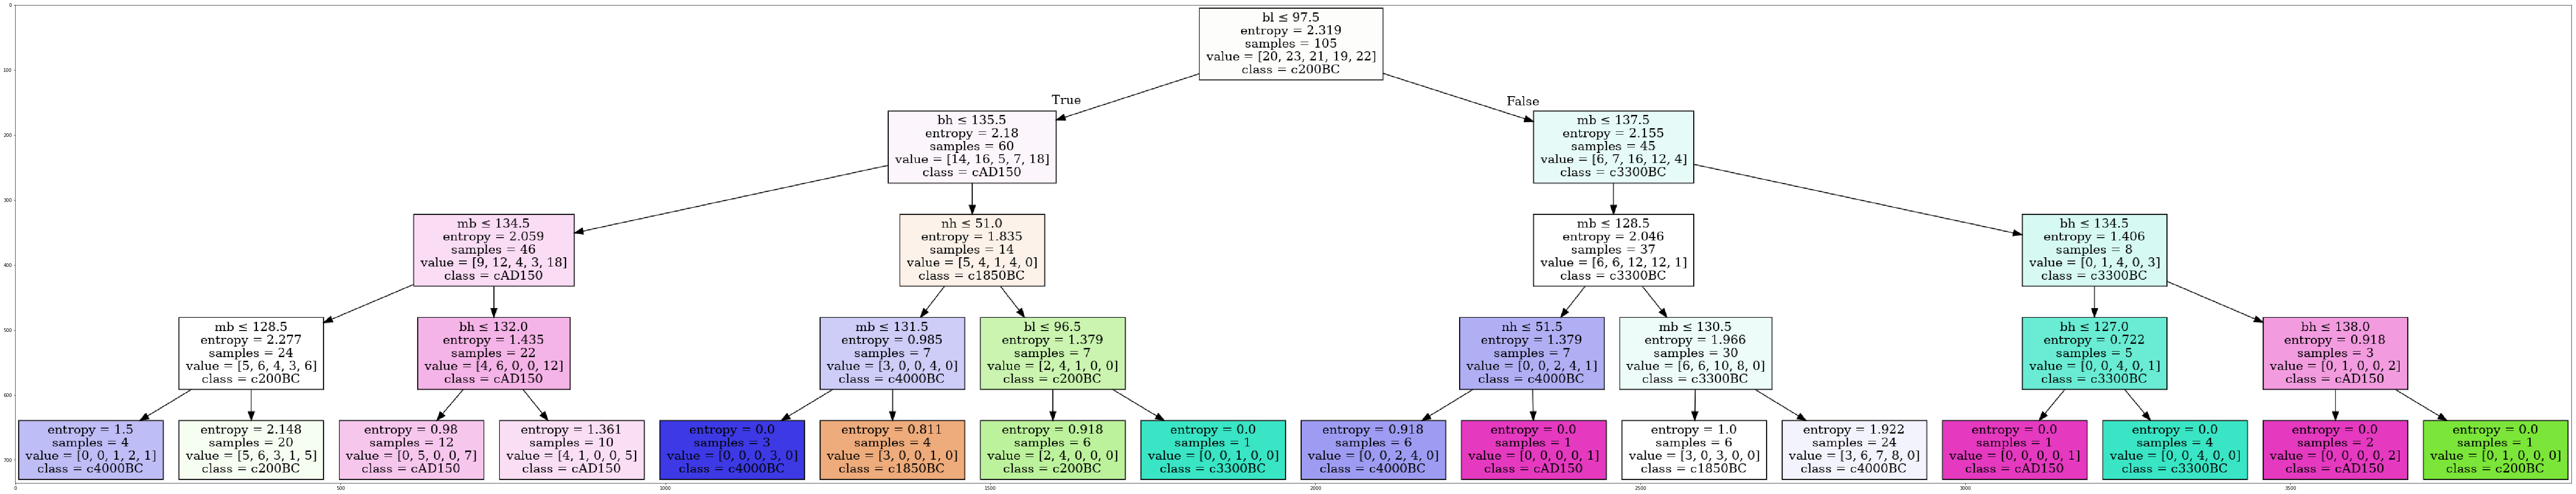

In [23]:
dot_data = StringIO()
filename = "skulltree.png"
out=tree.export_graphviz(skullsTree,feature_names=featureNames, out_file=dot_data, class_names= np.unique(y_trainset), filled=True,  special_characters=True,rotate=False)  
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png(filename)
img = mpimg.imread(filename)
plt.figure(figsize=(100, 200))
plt.imshow(img,interpolation='nearest')

## Want to learn more?

IBM SPSS Modeler is a comprehensive analytics platform that has many machine learning algorithms. It has been designed to bring predictive intelligence to decisions made by individuals, by groups, by systems – by your enterprise as a whole. A free trial is available through this course, available here: [SPSS Modeler](http://cocl.us/ML0101EN-SPSSModeler).

Also, you can use Watson Studio to run these notebooks faster with bigger datasets. Watson Studio is IBM's leading cloud solution for data scientists, built by data scientists. With Jupyter notebooks, RStudio, Apache Spark and popular libraries pre-packaged in the cloud, Watson Studio enables data scientists to collaborate on their projects without having to install anything. Join the fast-growing community of Watson Studio users today with a free account at [Watson Studio](https://cocl.us/ML0101EN_DSX)

### Thanks for completing this lesson!

Notebook created by: <a href = "https://ca.linkedin.com/in/saeedaghabozorgi">Saeed Aghabozorgi</a>

<hr>
Copyright &copy; 2018 [Cognitive Class](https://cocl.us/DX0108EN_CC). This notebook and its source code are released under the terms of the [MIT License](https://bigdatauniversity.com/mit-license/).​